In [1]:
import pandas as pd
import numpy as np
import nltk as nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [2]:
df = pd.read_csv('C:/Users/Junhong/Google Drive/Spring 2020/Capstone Project/Data/Final Datasets/all.csv')

In [3]:
df['product_name'] = df['product_name'].apply(lambda x: x.lower())

In [4]:
df['cat2'] = df['cat2'].apply(lambda x: x.lower())

In [5]:
df['product_name'].head()

0    pantene pro-v conditioner, daily moisture rene...
1    ogx anti-breakage keratin oil conditioner, 19....
2    ogx ever straightening + brazilian keratin the...
3    pantene pro-v radiant color volume conditioner...
4    softsheen-carson optimum salon hair care amla ...
Name: product_name, dtype: object

## Pre-processed the categories

In [6]:
#unique_cats = df['cat2'].unique()

In [7]:
#unique_cats = pd.DataFrame(unique_cats, columns = ['cats'])

In [8]:
#unique_cats.head()

In [9]:
#some cleaning on the unique_cats
df['tokenized'] = df['cat2'].apply(lambda x: nltk.word_tokenize(x))

In [10]:
lemmatizer = WordNetLemmatizer() 

In [11]:
df['stemmed'] = df['tokenized'].apply(lambda x:[lemmatizer.lemmatize(y) for y in x])

In [12]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
detokenizer = Detok()

In [13]:
df['processed_cats'] = df['stemmed'].apply(lambda x:detokenizer.detokenize(x))

In [14]:
df['processed_cats'] = df['processed_cats'].apply(lambda x: re.sub('&','',x))

In [15]:
df['processed_cats'] = df['processed_cats'].apply(lambda x: re.sub('  ',' ',x))

In [16]:
df['processed_cats'].unique()

array(['conditioner', 'eye makeup', 'face makeup', 'face mask',
       'facial cleanser', 'fake nail', 'hair color', 'hair styling tool',
       'lip care', 'lip makeup', 'makeup tool brush', 'manicure tool',
       'moisturizers', 'nail polish', 'nail polish remover', 'shampoo',
       '1080p tv', '4k tv', '720p tv', 'all-in-one printer',
       'computer accessory', 'desktop', 'dvd blue-ray player',
       'home theater', 'inkjet printer', 'laptop', 'laser printer',
       'monitor', 'pc component', 'printer ink', 'printer paper',
       'printer toner', 'projector', 'whole bean coffee',
       'bottled coffee', 'cooky', 'energy drinks/all energy drink',
       'water', 'instant coffee', 'ground coffee', 'soda pop',
       'pasta noodle', 'soup', 'single-serve cup pod',
       'nut, trail mix seed', 'cracker', 'boxed meal', 'milk',
       'canned good', 'chip', 'juice', 'porch swing',
       'outdoor lounge furniture', 'outdoor fireplace', 'firewood rack',
       'all trimmer and edg

## Pre-processed the product_names

In [17]:
df['product_name_tokenized'] = df['product_name'].apply(lambda x: nltk.word_tokenize(x))

In [18]:
lemmatizer = WordNetLemmatizer() 
df['product_name_tokenized'] = df['product_name_tokenized'].apply(lambda x:[lemmatizer.lemmatize(y) for y in x])

In [19]:
df['product_name_processed'] = df['product_name_tokenized'].apply(lambda x:detokenizer.detokenize(x))

In [20]:
df['product_name_processed']

0        pantene pro-v conditioner, daily moisture rene...
1        ogx anti-breakage keratin oil conditioner , 19...
2        ogx ever straightening + brazilian keratin the...
3        pantene pro-v radiant color volume conditioner...
4        softsheen-carson optimum salon hair care amla ...
                               ...                        
16890    farberware professional set of 8 rubber and st...
16891    gibson home sensation ii 16-piece flatware set...
16892                      imusa usa 12"wood serving spoon
16893    mainstay pierremont 20 piece stainless steel f...
16894    peroptimist 6pcs round long handle soup coffee...
Name: product_name_processed, Length: 16895, dtype: object

## Find matching (predict cat2 labels)

In [21]:
def check_cat(x):
    for i in df['processed_cats'].unique():
        a = re.search(i,x)
        if a != None:
            return i

In [22]:
df['cat_pred'] = df['product_name_processed'].apply(lambda x: check_cat(x))

In [23]:
(df['cat_pred'].isnull()).sum()

9031

In [24]:
(df['cat_pred'] ==df['processed_cats']).sum()

6152

In [25]:
df['cat_pred'].shape

(16895,)

In [26]:
df['cat_pred_valid'] = df['cat_pred'].apply(lambda x: x in df['processed_cats'].unique())

In [27]:
df['cat_pred_valid'].sum()

7864

In [28]:
#df.to_csv('naive_model.csv',index=False)

## Some anlysis on the Naive Model

In [29]:
(7864/16895)*100

46.54631547795206

### 7864 out of 16895 products have a label (46.5%)

In [30]:
pd.options.display.max_rows = 500

In [31]:
#some categories that are predicted correctly
df['cat2'][df['cat_pred'] ==df['processed_cats']].unique()

array(['conditioner', 'eye makeup', 'face makeup', 'face masks',
       'facial cleansers', 'fake nails', 'hair color',
       'hair styling tools', 'lip care', 'manicure tools', 'nail polish',
       'shampoos', '1080p tv', '720p tv', 'all-in-one printers',
       'desktop', 'home theater', 'inkjet printers', 'laptops',
       'laser printers', 'monitors', 'printer paper', 'projectors',
       'whole bean coffee', 'cookies', 'water', 'ground coffee',
       'crackers', 'soups', 'milk', 'instant coffee', 'juices', 'chips',
       'soda pop', 'porch swings', 'bistro sets', 'chainsaws',
       'fire pits', 'pole saws', 'patio heaters', 'tiki torches',
       'fire pit tables', 'outdoor fireplaces', 'leaf blowers',
       'tillers & cultivators', 'firewood racks', 'patio sets',
       'combo grills', 'charcoal grills', 'kamado grills', 'smokers',
       'gas grills', 'pellet grills', 'portable grills',
       'electric grills', 'desks', 'chairs', 'tv stands', 'sofas',
       'mattresses',

In [32]:
#Categories that have some right prediction
df['cat2'][df['cat_pred'] ==df['processed_cats']].nunique()

82

In [33]:
df['processed_cats'].nunique()-82

30

## 30 categories got no correct prediction

In [34]:
#All the ones that has a valid prediction
df_valid = df[df['cat_pred_valid']==True]

In [35]:
y_true = df_valid['processed_cats']
y_pred = df_valid['cat_pred']

In [36]:
print("Accuracy:", round(accuracy_score(y_true,y_pred),4), "\n"
     "F1 score:", round(f1_score(y_true,y_pred,average = 'weighted'),4))

Accuracy: 0.7823 
F1 score: 0.7477


## Bad accuracy even for those that are labelled!

In [37]:
df_valid['cat1'].unique()

array(['Hair Care', 'Makeup', 'Skin Care', 'Nail Care', 'TV',
       'Printer & Supplies', 'Computers', 'Home Audio & Theater',
       'Coffee', 'Snacks, Cookies & Chips', 'Beverages',
       'Meal Solutions, Grains & Pasta', 'Patio Furniture',
       'Outdoor Heating', 'Outdoor Power Equipment',
       'Grills & Outdoor Cooking', 'Furnitures', 'Appliances',
       'Home Decor', 'Kitchen & Dining'], dtype=object)

In [38]:
#can look at different cat1 categories to see how it does
df_app = df_valid[df_valid['cat0']=='Electronics']

In [39]:
y_true = df_app['processed_cats']
y_pred = df_app['cat_pred']

In [40]:
print("Accuracy:", round(accuracy_score(y_true,y_pred),4), "\n"
     "F1 score:", round(f1_score(y_true,y_pred,average = 'weighted'),4))

Accuracy: 0.7377 
F1 score: 0.7085


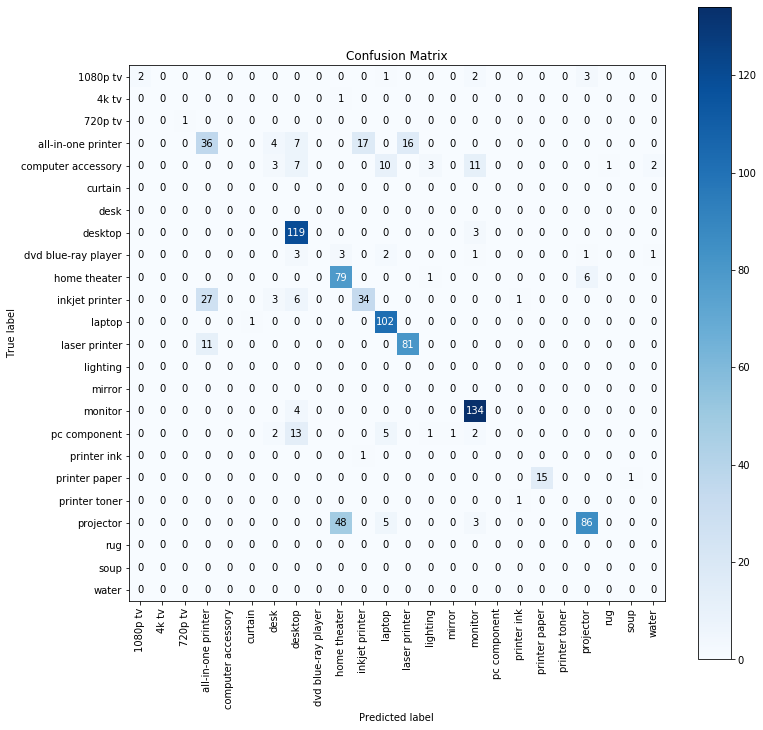

In [41]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12),
    x_tick_rotation = 90)

## Predictions are all over the place

In [196]:
df['cat1'].unique()

array(['Hair Care', 'Makeup', 'Skin Care', 'Nail Care', 'TV',
       'Printer & Supplies', 'Computers', 'Home Audio & Theater',
       'Coffee', 'Snacks, Cookies & Chips', 'Beverages',
       'Meal Solutions, Grains & Pasta', 'Patio Furniture',
       'Outdoor Heating', 'Outdoor Power Equipment',
       'Grills & Outdoor Cooking', 'Furnitures', 'Appliances',
       'Home Decor', 'Kitchen & Dining'], dtype=object)

In [197]:
df_G = df[df['cat0'] == 'Garden & Patio']

In [205]:
z = df['cat1'][df['cat_pred'] ==df['processed_cats']].unique()

In [206]:
df_G.shape

(3956, 27)

In [207]:
df_G_valid = df_G[df_G['cat_pred_valid']==True]

In [208]:
df_G_valid.shape

(1816, 27)

In [209]:
df_G_valid['cat_pred'].unique()

array(['porch swing', 'chair', 'fire pit', 'bistro set', 'chainsaw',
       'pole saw', 'patio heater', 'sofa', 'tiki torch', 'water',
       'fire pit table', 'outdoor fireplace', 'vacuum', 'leaf blower',
       'rug', 'desktop', 'cookware', 'tiller cultivator', 'mirror',
       'firewood rack', 'patio set', 'lighting', 'bed', 'microwave',
       'gas grill', 'smoker', 'combo grill', 'charcoal grill',
       'pellet grill', 'kamado grill', 'portable grill', 'electric grill',
       'dishwasher', 'desk', 'chip'], dtype=object)

In [210]:
1816/3956

0.4590495449949444

In [211]:
print("Accuracy:", round(accuracy_score(df_G_valid['processed_cats'],df_G_valid['cat_pred']),4), "\n"
     "F1 score:", round(f1_score(df_G_valid['processed_cats'],df_G_valid['cat_pred'],average = 'weighted'),4))

Accuracy: 0.5672 
F1 score: 0.5567


In [76]:
df_G_correct df_G_valid[df_G_valid['cat_pred']==df_G_valid['processed_cats']]

SyntaxError: invalid syntax (<ipython-input-76-4e7e12a38a77>, line 1)